In [1]:
import pandas as pd


xls = pd.ExcelFile("/Users/kingf.wong/Development/hackathon/data/Location Sciences - REIT insights.xlsx")





In [66]:
visits = pd.read_excel(xls, "visits")
distance = pd.read_excel(xls, "distance")
demographics = pd.read_excel(xls,"demo")
REIT_price = pd.read_excel(xls,"SHB.L")


In [67]:
visits.date = visits["date"].map(lambda x: x.strftime('%Y-%m-%d'))

In [68]:
REIT_price.date = REIT_price["Date"].map(lambda x: x.strftime('%Y-%m-%d'))


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [69]:
distance.month = distance["month"].map(lambda x: x[0:4] + "-" + x[5:])

In [70]:
distance.month = pd.to_datetime(distance["month"])

In [71]:
demographics.month = demographics["month"].map(lambda x: x[0:4] + "-" + x[5:])

In [72]:
demographics.month = pd.to_datetime(demographics["month"])

In [73]:
visits.index = pd.to_datetime(visits.date)

In [74]:
visits.columns = visits.columns.map(lambda x: "visits_" + x)

In [75]:
visits.columns

Index(['visits_date', 'visits_hour', 'visits_area', 'visits_visits',
       'visits_avg_dwell_mins'],
      dtype='object')

In [76]:
visits.index

DatetimeIndex(['2017-10-01', '2017-10-01', '2017-10-01', '2017-10-01',
               '2017-10-01', '2017-10-01', '2017-10-01', '2017-10-01',
               '2017-10-01', '2017-10-01',
               ...
               '2019-03-31', '2019-03-31', '2019-03-31', '2019-03-31',
               '2019-03-31', '2019-03-31', '2019-03-31', '2019-03-31',
               '2019-03-31', '2019-03-31'],
              dtype='datetime64[ns]', name='date', length=51811, freq=None)

In [77]:
visits_monthly = visits.resample('1M').sum()

In [78]:
visits.head()

,visits_date,visits_hour,visits_area,visits_visits,visits_avg_dwell_mins
date,,,,,
2017-10-01,2017-10-01,0,Carnaby,23,23.260870
2017-10-01,2017-10-01,0,Chinatown,43,28.000000
2017-10-01,2017-10-01,0,CoventGarden,204,25.750000
2017-10-01,2017-10-01,0,Fitzrovia,288,21.555556
2017-10-01,2017-10-01,1,Carnaby,16,29.375000


In [79]:
visits_monthly.head()

,visits_hour,visits_visits,visits_avg_dwell_mins
date,,,
2017-10-31,34116,1254994,83150.508983
2017-11-30,32984,1153037,79119.678285
2017-12-31,34012,1030847,86318.613163
2018-01-31,34007,1018284,88200.691381
2018-02-28,30752,934559,82216.556365


In [80]:
REIT_price.index = pd.to_datetime(REIT_price.date)
REIT_price.columns = REIT_price.columns.map(lambda x: "price_" + x)
REIT_price_monthly = REIT_price.resample('1M').first()

In [81]:
distance.index = distance.month

In [82]:
demographics.index = demographics.month

In [83]:
distance.columns = distance.columns.map(lambda x: "distance_" + x)
demographics.columns = demographics.columns.map(lambda x: "demographics_" + x)

In [84]:
from functools import reduce
xs = [visits_monthly, distance, demographics, REIT_price_monthly]
X = reduce(lambda X,x:pd.merge_asof(X.dropna().sort_index(), x.sort_index(), left_index=True, right_index=True,
                  direction='forward', tolerance=pd.Timedelta('2d')),xs)


In [85]:
X.head()

,visits_hour,visits_visits,visits_avg_dwell_mins,distance_area,distance_borough,distance_month,distance_avg_distance_travelled,distance_%visitors,demographics_area,demographics_demo_group,demographics_month,demographics_%visitors,price_Date,price_Open,price_High,price_Low,price_Close,price_Adj Close,price_Volume
date,,,,,,,,,,,,,,,,,,,
2017-10-31,34116,1254994,83150.508983,Carnaby,Rushmoor,2017-11-01,50.51,0.10,CoventGarden,Prosperous suburban families,2017-11-01,3.08,2017-10-02,1014.0,1020.0,1010.0,1010.0,972.759766,473013
2017-11-30,32984,1153037,79119.678285,Carnaby,Blaenau Gwent,2017-12-01,211.76,0.01,Carnaby,Owner occupiers in small towns and villages,2017-12-01,0.41,2017-11-01,993.0,1002.0,988.0,993.0,956.386536,475847
2017-12-31,34012,1030847,86318.613163,Fitzrovia,Adur,2018-01-01,77.04,0.05,Chinatown,Low income older people in smaller semis,2018-01-01,0.08,2017-12-01,984.0,994.5,980.5,987.5,951.089478,628089
2018-01-31,34007,1018284,88200.691381,Fitzrovia,Breckland,2018-02-01,136.33,0.02,Fitzrovia,"Poorer families, many children, terraced housing",2018-02-01,0.15,2018-01-02,1041.0,1046.0,1030.0,1040.0,1001.653625,344513
2018-02-28,30752,934559,82216.556365,Fitzrovia,Wyre Forest,2018-03-01,174.96,0.01,Fitzrovia,"Settled suburbia, older people",2018-03-01,1.33,2018-02-01,1002.0,1012.0,985.0,985.0,956.260559,644892


In [22]:
demographics.head()

,demographics_area,demographics_demo_group,demographics_month,demographics_%visitors
month,,,,
2017-10-01,Carnaby,Active communal population,2017-10-01,0.62
2017-10-01,Carnaby,Affluent professionals,2017-10-01,1.96
2017-10-01,Carnaby,Asset rich families,2017-10-01,1.04
2017-10-01,Carnaby,Better-off villagers,2017-10-01,1.16
2017-10-01,Carnaby,Business areas without resident population,2017-10-01,10.37


In [23]:
X.sort_index()[["demographics_demo_group", "demographics_month"]]

,demographics_demo_group,demographics_month
date,,
2017-10-31,Prosperous suburban families,2017-11-01
2017-11-30,Owner occupiers in small towns and villages,2017-12-01
2017-12-31,Low income older people in smaller semis,2018-01-01
2018-01-31,"Poorer families, many children, terraced housing",2018-02-01
2018-02-28,"Settled suburbia, older people",2018-03-01
2018-03-31,Exclusive enclaves,2018-04-01
2018-04-30,Younger professionals in smaller flats,2018-05-01
2018-05-31,"Young people in small, low cost terraces",2018-06-01
2018-06-30,Low income older people in smaller semis,2018-07-01


In [24]:
X.sort_values('demographics_month')

,visits_hour,visits_visits,visits_avg_dwell_mins,distance_area,distance_borough,distance_month,distance_avg_distance_travelled,distance_%visitors,demographics_area,demographics_demo_group,demographics_month,demographics_%visitors,price_Date,price_Open,price_High,price_Low,price_Close,price_Adj Close,price_Volume
date,,,,,,,,,,,,,,,,,,,
2017-10-31,34116,1254994,83150.508983,Carnaby,Rushmoor,2017-11-01,50.51,0.10,CoventGarden,Prosperous suburban families,2017-11-01,3.08,2017-10-02,1014.0,1020.0,1010.0,1010.0,972.759766,473013
2017-11-30,32984,1153037,79119.678285,Carnaby,Blaenau Gwent,2017-12-01,211.76,0.01,Carnaby,Owner occupiers in small towns and villages,2017-12-01,0.41,2017-11-01,993.0,1002.0,988.0,993.0,956.386536,475847
2017-12-31,34012,1030847,86318.613163,Fitzrovia,Adur,2018-01-01,77.04,0.05,Chinatown,Low income older people in smaller semis,2018-01-01,0.08,2017-12-01,984.0,994.5,980.5,987.5,951.089478,628089
2018-01-31,34007,1018284,88200.691381,Fitzrovia,Breckland,2018-02-01,136.33,0.02,Fitzrovia,"Poorer families, many children, terraced housing",2018-02-01,0.15,2018-01-02,1041.0,1046.0,1030.0,1040.0,1001.653625,344513
2018-02-28,30752,934559,82216.556365,Fitzrovia,Wyre Forest,2018-03-01,174.96,0.01,Fitzrovia,"Settled suburbia, older people",2018-03-01,1.33,2018-02-01,1002.0,1012.0,985.0,985.0,956.260559,644892
2018-03-31,34104,979667,93273.912125,Chinatown,Derby,2018-04-01,179.59,0.02,Fitzrovia,Exclusive enclaves,2018-04-01,0.32,2018-03-01,962.0,966.0,952.5,961.5,933.446228,452727
2018-04-30,33006,900781,90294.961835,CoventGarden,Rhondda Cynon Taf,2018-05-01,226.03,0.02,CoventGarden,Younger professionals in smaller flats,2018-05-01,9.93,2018-04-03,975.0,983.0,968.5,979.0,950.435608,426458
2018-05-31,34049,898837,93167.713317,Fitzrovia,Bexley,2018-06-01,19.79,0.82,Fitzrovia,"Young people in small, low cost terraces",2018-06-01,0.17,2018-05-01,1010.0,1023.0,1010.0,1011.0,981.501953,130893
2018-06-30,33039,966993,83281.646224,CoventGarden,Gravesham,2018-07-01,35.64,0.19,Chinatown,Low income older people in smaller semis,2018-07-01,0.12,2018-06-01,928.0,934.0,916.5,917.0,890.244568,1039744


In [26]:
X.describe()

,visits_hour,visits_visits,visits_avg_dwell_mins,distance_avg_distance_travelled,distance_%visitors,demographics_%visitors,price_Open,price_High,price_Low,price_Close,price_Adj Close,price_Volume
count,14.000000,1.400000e+01,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,1.400000e+01
mean,33372.642857,9.682271e+05,86172.831020,133.715000,0.119286,1.604286,952.642857,959.571429,945.607143,950.428571,923.846231,5.138219e+05
std,1188.243216,1.209613e+05,4456.089251,107.928153,0.214026,2.585506,63.028513,64.247076,63.425358,63.660414,56.117095,2.518383e+05
min,30752.000000,7.912340e+05,79118.301044,19.790000,0.010000,0.080000,822.000000,828.000000,814.000000,817.000000,800.247131,1.308930e+05
25%,33014.250000,8.993230e+05,83183.293293,46.400000,0.020000,0.207500,927.625000,933.000000,918.625000,919.875000,895.048630,3.649992e+05
50%,34030.500000,9.507760e+05,86495.497003,115.480000,0.035000,0.585000,968.500000,974.500000,960.500000,970.250000,941.940918,4.688890e+05
75%,34099.250000,1.008630e+06,88163.672246,180.535000,0.107500,1.840000,999.750000,1009.500000,987.250000,991.625000,956.355042,5.976688e+05
max,34116.000000,1.254994e+06,93273.912125,412.010000,0.820000,9.930000,1041.000000,1046.000000,1030.000000,1040.000000,1001.653625,1.039744e+06


In [31]:
distance.groupby(["distance_area", "distance_borough", "distance_month"]).agg({'distance_avg_distance_travelled': ['mean'], 'distance_%visitors': 'mean'})

distance_avg_distance_travelled  \
                                                                         mean   
distance_area distance_borough distance_month                                   
Carnaby       Aberdeen City    2017-10-01                              640.98   
                               2017-11-01                              639.75   
                               2017-12-01                              639.54   
                               2018-01-01                              640.27   
                               2018-02-01                              641.23   
                               2018-03-01                              641.15   
                               2018-04-01                              639.23   
                               2018-05-01                              640.74   
                               2018-06-01                              639.45   
                               2018-07-01                              640.29   
                               2018-08-01                              640.49   
                               2018-09-01                              640.64   
                               2019-01-01                              640.92   
                               2019-02-01                              640.19   
                               2019-03-01                              638.70   
              Aberdeenshire    2017-10-01                              639.57   
                               2017-11-01                              656.84   
                               2018-01-01                              642.47   
                               2018-02-01                              642.77   
                               2018-03-01                              677.95   
                               2018-04-01                              652.61   
                               2018-05-01                              656.76   
                               2018-06-01                              643.86   
                               2018-07-01                              661.36   
                               2018-08-01                              657.06   
                               2018-09-01                              638.35   
                               2019-01-01                              666.01   
                               2019-02-01                              689.40   
                               2019-03-01                              663.10   
              Adur             2017-10-01                               76.31   
...                                                                       ...   
Fitzrovia     Wyre Forest      2017-10-01                              174.21   
                               2017-11-01                              175.03   
                               2017-12-01                              174.64   
                               2018-01-01                              175.21   
                               2018-02-01                              172.88   
                               2018-03-01                              174.96   
                               2018-04-01                              173.53   
                               2018-05-01                              174.40   
                               2018-06-01                              174.58   
                               2018-07-01                              174.09   
                               2018-08-01                              173.70   
                               2018-09-01                              174.19   
                               2019-01-01                              173.66   
                               2019-02-01                              173.83   
                               2019-03-01                              173.91   
              York             2017-10-01                              278.84

In [42]:
import numpy as np
distance.pivot_table(index=['distance_month'], values=['distance_avg_distance_travelled'], columns=["distance_borough"])

distance_avg_distance_travelled                         \
distance_borough                   Aberdeen City Aberdeenshire     Adur   
distance_month                                                            
2017-10-01                              640.1725    645.802500  76.2025   
2017-11-01                              640.3850    651.060000  76.1975   
2017-12-01                              640.0200    644.136667  76.3200   
2018-01-01                              640.5400    655.080000  76.2475   
2018-02-01                              640.2375    643.562500  76.3475   
2018-03-01                              640.7000    662.393333  76.3225   
2018-04-01                              639.4700    651.572500  76.2150   
2018-05-01                              640.3950    650.375000  76.2125   
2018-06-01                              639.8975    647.420000  75.9850   
2018-07-01                              640.3000    653.735000  76.4650   
2018-08-01                              640.4525    654.635000  76.4325   
2018-09-01                              640.3600    650.770000  76.2775   
2019-01-01                              640.3675    648.590000  76.4200   
2019-02-01                              639.7575    654.595000  76.2975   
2019-03-01                              639.7350    654.920000  76.2450   

                                                                       \
distance_borough   Allerdale Amber Valley       Angus Argyll and Bute   
distance_month                                                          
2017-10-01        404.606667   189.672500  593.175000             NaN   
2017-11-01        404.370000   189.972500  594.785000      597.546667   
2017-12-01        409.955000   190.537500  592.200000      584.470000   
2018-01-01        411.315000   190.945000         NaN             NaN   
2018-02-01        413.016667   190.275000  594.720000             NaN   
2018-03-01        407.980000   189.517500  586.155000             NaN   
2018-04-01        409.195000   189.940000  593.335000      591.100000   
2018-05-01        409.290000   190.417500  595.895000      605.375000   
2018-06-01        409.253333   189.405000  591.310000      594.730000   
2018-07-01        408.012500   189.475000  589.780000      596.180000   
2018-08-01        413.990000   189.825000  592.755000      598.290000   
2018-09-01        412.173333   189.992500  592.793333      598.690000   
2019-01-01        409.823333   189.273333         NaN      586.443333   
2019-02-01        411.222500   189.510000  584.630000             NaN   
2019-03-01        413.116667   189.760000  596.400000      596.500000   

                                                ...                          \
distance_borough     Arun    Ashfield  Ashford  ... Wokingham Wolverhampton   
distance_month                                  ...                           
2017-10-01        84.3775  189.780000  79.3975  ...   52.9200      181.6100   
2017-11-01        84.1325  189.430000  80.3825  ...   52.6625      181.5925   
2017-12-01        84.0750  190.047500  79.6350  ...   52.7450      180.8500   
2018-01-01        84.3875  190.617500  79.8050  ...   52.6550      181.1325   
2018-02-01        83.8625  188.646667  79.9950  ...   53.1325      181.2875   
2018-03-01        83.7825  191.006667  80.0350  ...   52.9725      181.4825   
2018-04-01        83.2900  187.785000  79.7200  ...   52.7600      181.8800   
2018-05-01        84.6675  187.502500  79.5100  ...   52.5575      181.4200   
2018-06-01        83.5950  188.120000  79.6850  ...   52.8300      181.1950   
2018-07-01        83.6525  189.755000  79.7900  ...   52.9800      181.8750   
2018-08-01        84.2525  190.365000  79.9975  ...   52.8025      181.8175   
2018-09-01        84.4025  189.340000  79.9400  ...   52.6225      181.7375   
2019-01-01        84.3850  190.717500  79.6275  ...   52.6875      181.6200   
2019-02-01        84.0000  190.515000  79.9925  ...   52.6225      181.9725   
2019-03-

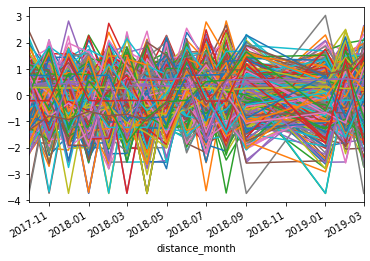

In [93]:
import matplotlib.pyplot as plt
distance_pivot_by_borough = distance.pivot_table(index=['distance_month'], values=['distance_avg_distance_travelled'], columns=["distance_borough"], aggfunc=np.sum)
from sklearn import preprocessing as prep
distance_pivot_by_borough_nom = pd.DataFrame(prep.StandardScaler().fit_transform(distance_pivot_by_borough), columns=distance_pivot_by_borough.columns, index=distance_pivot_by_borough.index)
distance_pivot_by_borough_nom.plot(legend=False)


In [62]:
distance_pivot_by_borough_nom['2018-09'::]

distance_avg_distance_travelled                          \
distance_borough                   Aberdeen City Aberdeenshire      Adur   
distance_month                                                             
2018-09-01                              0.527301     -0.098894 -0.014571   
2019-01-01                              0.550030     -0.554522  1.231263   
2019-02-01                             -1.298555      0.700546  0.160283   
2019-03-01                             -1.366741      0.768472 -0.298709   

                                                                             \
distance_borough Allerdale Amber Valley     Angus Argyll and Bute      Arun   
distance_month                                                                
2018-09-01        0.857836     0.200268  0.191251        0.642948  0.513840   
2019-01-01        0.000729    -1.377621       NaN       -1.452587  0.478133   
2019-02-01        0.511042    -0.858362 -2.230725             NaN -0.307420   
2019-03-01        1.201894    -0.309849  1.261311        0.268216  2.544035   

                                      ...                                    \
distance_borough  Ashfield   Ashford  ... Wokingham Wolverhampton Worcester   
distance_month                        ...                                     
2018-09-01       -0.281309  0.364363  ... -1.060520      0.655189 -0.281120   
2019-01-01        0.921289 -0.862174  ... -0.659353      0.389113  1.258794   
2019-02-01        0.744500  0.570421  ... -1.060520      1.187342 -0.542905   
2019-03-01        1.434193  1.365217  ...  1.053320     -2.713224  0.488837   

                                                                    \
distance_borough  Worthing   Wrexham  Wychavon   Wycombe      Wyre   
distance_month                                                       
2018-09-01       -0.371141 -1.287905 -1.027494  1.646689  0.216739   
2019-01-01        0.084032 -0.330085 -0.117146 -0.598796  0.077296   
2019-02-01       -1.596606  1.635220  1.071681  1.137404 -2.390063   
2019-03-01       -0.021008 -0.892614  0.174361 -0.853439  0.007575   

                                        
distance_borough Wyre Forest      York  
distance_month                          
2018-09-01         -0.906444  1.890267  
2019-01-01         -0.736064  0.793097  
2019-02-01          0.290823  0.949835  
2019-03-01         -1.569546  1.561116  

[4 rows x 376 columns]

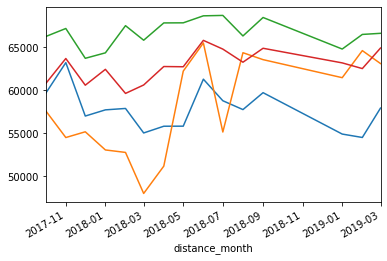

In [90]:
import matplotlib.pyplot as plt
distance_pivot_by_area = distance.pivot_table(index=['distance_month'], values=['distance_avg_distance_travelled'], columns=["distance_area"], aggfunc=np.sum)
distance_pivot_by_area.plot(legend=False)


In [61]:
distance_pivot_by_area['2018-09'::]

distance_avg_distance_travelled                           \
distance_area                          Carnaby   Chinatown CoventGarden   
distance_month                                                            
2018-09-01                          173.030522  180.506335   185.980000   
2019-01-01                          168.346810  177.572630   179.919278   
2019-02-01                          168.164228  180.917899   183.114298   
2019-03-01                          172.329196  179.215369   182.967967   

                            
distance_area    Fitzrovia  
distance_month              
2018-09-01      180.167944  
2019-01-01      177.916451  
2019-02-01      176.550791  
2019-03-01      180.240222

In [115]:
distance_pivot_by_area

distance_avg_distance_travelled                         \
distance_area                          Carnaby Chinatown CoventGarden   
distance_month                                                          
2017-10-01                            59621.05  57592.96     66225.45   
2017-11-01                            63191.25  54478.15     67161.71   
2017-12-01                            56977.71  55146.21     63693.89   
2018-01-01                            57696.84  53034.10     64329.67   
2018-02-01                            57860.98  52747.10     67489.80   
2018-03-01                            55010.04  47973.20     65796.83   
2018-04-01                            55792.69  51151.17     67809.11   
2018-05-01                            55799.76  62204.53     67820.46   
2018-06-01                            61266.79  65477.40     68634.29   
2018-07-01                            58757.27  55120.21     68681.88   
2018-08-01                            57728.25  64342.70     66293.83   
2018-09-01                            59695.53  63538.23     68440.64   
2019-01-01                            54881.06  61440.13     64770.94   
2019-02-01                            54485.21  64587.69     66470.49   
2019-03-01                            57902.61  63083.81     66600.34   

                          
distance_area  Fitzrovia  
distance_month            
2017-10-01      60752.26  
2017-11-01      63669.50  
2017-12-01      60566.00  
2018-01-01      62410.23  
2018-02-01      59610.06  
2018-03-01      60590.76  
2018-04-01      62736.70  
2018-05-01      62710.60  
2018-06-01      65779.59  
2018-07-01      64764.27  
2018-08-01      63240.60  
2018-09-01      64860.46  
2019-01-01      63160.34  
2019-02-01      62498.98  
2019-03-01      64886.48

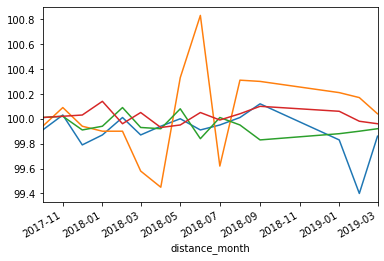

In [89]:
distance_pivot_by_area_percent_visits = distance.pivot_table(index=['distance_month'], values=['distance_%visitors'], columns=["distance_area"], aggfunc=np.average)
distance_pivot_by_area_percent_visits.plot(legend=False)

In [59]:
distance_pivot_by_area_percent_visits['2018-09'::]

distance_%visitors                                 
distance_area             Carnaby Chinatown CoventGarden Fitzrovia
distance_month                                                    
2018-09-01               0.290203  0.284943     0.271277  0.278056
2019-01-01               0.306227  0.289624     0.277444  0.281859
2019-02-01               0.306790  0.280588     0.275207  0.282429
2019-03-01               0.297202  0.284205     0.274505  0.277667

In [116]:
distance_pivot_by_area_percent_visits

distance_%visitors                                 
distance_area             Carnaby Chinatown CoventGarden Fitzrovia
distance_month                                                    
2017-10-01                  99.91     99.94       100.01    100.01
2017-11-01                 100.03    100.09       100.02    100.02
2017-12-01                  99.79     99.94        99.91    100.03
2018-01-01                  99.87     99.90        99.94    100.14
2018-02-01                 100.01     99.90       100.09     99.96
2018-03-01                  99.87     99.58        99.93    100.05
2018-04-01                  99.94     99.45        99.92     99.93
2018-05-01                 100.00    100.33       100.08     99.95
2018-06-01                  99.91    100.83        99.84    100.05
2018-07-01                  99.95     99.62       100.01     99.99
2018-08-01                 100.01    100.31        99.95    100.04
2018-09-01                 100.12    100.30        99.83    100.10
2019-01-01                  99.83    100.21        99.88    100.06
2019-02-01                  99.40    100.17        99.90     99.98
2019-03-01                  99.86    100.04        99.92     99.96

## distance, demographics tables missing 2018-10-01 to 2018-12-01 data
## we will have to remove corresponding price data as well

In [48]:
REIT_price.columns

Index(['price_Date', 'price_Open', 'price_High', 'price_Low', 'price_Close',
       'price_Adj Close', 'price_Volume'],
      dtype='object')

In [98]:
REIT_price_monthly

,price_Date,price_Open,price_High,price_Low,price_Close,price_Adj Close,price_Volume
Date,,,,,,,
2017-10-31,2017-10-02,1014.0,1020.0,1010.0,1010.0,972.759766,473013
2017-11-30,2017-11-01,993.0,1002.0,988.0,993.0,956.386536,475847
2017-12-31,2017-12-01,984.0,994.5,980.5,987.5,951.089478,628089
2018-01-31,2018-01-02,1041.0,1046.0,1030.0,1040.0,1001.653625,344513
2018-02-28,2018-02-01,1002.0,1012.0,985.0,985.0,956.260559,644892
2018-03-31,2018-03-01,962.0,966.0,952.5,961.5,933.446228,452727
2018-04-30,2018-04-03,975.0,983.0,968.5,979.0,950.435608,426458
2018-05-31,2018-05-01,1010.0,1023.0,1010.0,1011.0,981.501953,130893
2018-06-30,2018-06-01,928.0,934.0,916.5,917.0,890.244568,1039744


In [108]:
REIT_price_monthly_dropped = REIT_price_monthly.loc[(REIT_price_monthly.index < "2018-09-30") |(REIT_price_monthly.index > "2018-11-30")]

In [109]:
REIT_price_monthly_dropped

,price_Date,price_Open,price_High,price_Low,price_Close,price_Adj Close,price_Volume
Date,,,,,,,
2017-10-31,2017-10-02,1014.0,1020.0,1010.0,1010.0,972.759766,473013
2017-11-30,2017-11-01,993.0,1002.0,988.0,993.0,956.386536,475847
2017-12-31,2017-12-01,984.0,994.5,980.5,987.5,951.089478,628089
2018-01-31,2018-01-02,1041.0,1046.0,1030.0,1040.0,1001.653625,344513
2018-02-28,2018-02-01,1002.0,1012.0,985.0,985.0,956.260559,644892
2018-03-31,2018-03-01,962.0,966.0,952.5,961.5,933.446228,452727
2018-04-30,2018-04-03,975.0,983.0,968.5,979.0,950.435608,426458
2018-05-31,2018-05-01,1010.0,1023.0,1010.0,1011.0,981.501953,130893
2018-06-30,2018-06-01,928.0,934.0,916.5,917.0,890.244568,1039744


In [86]:
demographics.columns

Index(['demographics_area', 'demographics_demo_group', 'demographics_month',
       'demographics_%visitors'],
      dtype='object')

In [87]:
demographics_pivot_by_area_percent_visitors = demographics.pivot_table(index=['demographics_month'], values=['demographics_%visitors'], columns=["demographics_area", "demographics_demo_group"])


In [88]:
demographics_pivot_by_area_percent_visitors

demographics_%visitors                         \
demographics_area                          Carnaby                          
demographics_demo_group Active communal population Affluent professionals   
demographics_month                                                          
2017-10-01                                    0.62                   1.96   
2017-11-01                                    0.51                   1.94   
2017-12-01                                    0.53                   2.21   
2018-01-01                                    0.53                   2.01   
2018-02-01                                    0.54                   2.16   
2018-03-01                                    0.53                   1.96   
2018-04-01                                    0.54                   2.04   
2018-05-01                                    0.60                   2.11   
2018-06-01                                    0.58                   2.05   
2018-07-01                                    0.64                   1.96   
2018-08-01                                    0.61                   2.08   
2018-09-01                                    0.64                   1.80   
2019-01-01                                    0.56                   2.00   
2019-02-01                                    0.64                   1.96   
2019-03-01                                    0.56                   2.11   

                                                                  \
demographics_area                                                  
demographics_demo_group Asset rich families Better-off villagers   
demographics_month                                                 
2017-10-01                             1.04                 1.16   
2017-11-01                             1.09                 1.15   
2017-12-01                             1.41                 1.41   
2018-01-01                             1.13                 1.21   
2018-02-01                             1.20                 1.28   
2018-03-01                             1.08                 1.23   
2018-04-01                             1.06                 1.42   
2018-05-01                             1.02                 1.24   
2018-06-01                             1.12                 1.33   
2018-07-01                             1.20                 1.23   
2018-08-01                             1.16                 1.23   
2018-09-01                             1.00                 1.20   
2019-01-01                             1.17                 1.36   
2019-02-01                             1.27                 1.56   
2019-03-01                             1.09                 1.38   

                                                                    \
demographics_area                                                    
demographics_demo_group Business areas without resident population   
demographics_month                                                   
2017-10-01                                                   10.37   
2017-11-01                                                   10.50   
2017-12-01                                                    9.49   
2018-01-01                                                    9.82   
2018-02-01                                                   10.45   
2018-03-01                                                   10.24   
2018-04-01                                                   10.48   
2018-05-01                                                   11.10   
2018-06-01                                                   10.45   
2018-07-01                                                   10.50   
2018-08-01                                                   10.82   
2018-09-01                                                   10.27   
2019-01-01                                                    9.75   
2019-02-01                                                    9.29   
2019-03-01 

In [110]:
REIT_price_monthly_dropped

,price_Date,price_Open,price_High,price_Low,price_Close,price_Adj Close,price_Volume
Date,,,,,,,
2017-10-31,2017-10-02,1014.0,1020.0,1010.0,1010.0,972.759766,473013
2017-11-30,2017-11-01,993.0,1002.0,988.0,993.0,956.386536,475847
2017-12-31,2017-12-01,984.0,994.5,980.5,987.5,951.089478,628089
2018-01-31,2018-01-02,1041.0,1046.0,1030.0,1040.0,1001.653625,344513
2018-02-28,2018-02-01,1002.0,1012.0,985.0,985.0,956.260559,644892
2018-03-31,2018-03-01,962.0,966.0,952.5,961.5,933.446228,452727
2018-04-30,2018-04-03,975.0,983.0,968.5,979.0,950.435608,426458
2018-05-31,2018-05-01,1010.0,1023.0,1010.0,1011.0,981.501953,130893
2018-06-30,2018-06-01,928.0,934.0,916.5,917.0,890.244568,1039744


In [111]:
REIT_price.head()

,price_Date,price_Open,price_High,price_Low,price_Close,price_Adj Close,price_Volume
Date,,,,,,,
2017-10-02,2017-10-02,1014.0,1020.0,1010.0,1010.0,972.759766,473013
2017-10-03,2017-10-03,1018.0,1022.0,1009.0,1010.0,972.759766,311183
2017-10-04,2017-10-04,988.5,990.5,980.5,984.0,947.718445,866641
2017-10-05,2017-10-05,984.5,992.0,978.0,989.5,953.015686,467311
2017-10-06,2017-10-06,990.0,992.5,983.0,989.5,953.015686,363327


In [113]:
REIT_price_monthly = REIT_price.resample('1M').last()
REIT_price_monthly

,price_Date,price_Open,price_High,price_Low,price_Close,price_Adj Close,price_Volume
Date,,,,,,,
2017-10-31,2017-10-31,987.0,999.0,983.317017,990.0,953.497253,625029
2017-11-30,2017-11-30,988.0,998.0,983.000000,992.5,955.905029,571451
2017-12-31,2017-12-29,1031.0,1045.0,1026.000000,1044.0,1005.506165,432465
2018-01-31,2018-01-31,995.0,1004.0,993.500000,1000.0,970.822937,900511
2018-02-28,2018-02-28,962.5,964.5,951.500000,962.5,934.417114,855784
2018-03-31,2018-03-29,977.0,988.0,977.000000,982.0,953.348083,618424
2018-04-30,2018-04-30,1001.0,1016.0,1001.000000,1011.0,981.501953,252066
2018-05-31,2018-05-31,928.5,935.5,922.500000,922.5,895.584106,3147459
2018-06-30,2018-06-29,934.0,937.0,931.000000,935.5,916.317261,454919


In [114]:
REIT_price

,price_Date,price_Open,price_High,price_Low,price_Close,price_Adj Close,price_Volume
Date,,,,,,,
2017-10-02,2017-10-02,1014.0,1020.000000,1010.000000,1010.0,972.759766,473013
2017-10-03,2017-10-03,1018.0,1022.000000,1009.000000,1010.0,972.759766,311183
2017-10-04,2017-10-04,988.5,990.500000,980.500000,984.0,947.718445,866641
2017-10-05,2017-10-05,984.5,992.000000,978.000000,989.5,953.015686,467311
2017-10-06,2017-10-06,990.0,992.500000,983.000000,989.5,953.015686,363327
2017-10-09,2017-10-09,992.0,994.500000,985.000000,987.0,950.607910,353763
2017-10-10,2017-10-10,992.0,992.000000,987.000000,988.0,951.570984,372703
2017-10-11,2017-10-11,989.0,998.000000,989.000000,996.5,959.757568,281818
2017-10-12,2017-10-12,1009.0,1009.000000,998.500000,1004.0,966.981018,185596
